# Project 1


## Exporatory Data Analysis


### Dataset reference: https://www.kaggle.com/CooperUnion/anime-recommendations-database?fbclid=IwAR3sXr48_xQHp8NgF9AyXuVf0RGwTkFw8bfkRoXda6zix9rQsevpya8JDOM#rating.csv


### Context
This data set contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compilation of those ratings.


### Content

#### Anime.csv

**anime_id** - myanimelist.net's unique id identifying an anime.

**name** - full name of anime.

**genre** - comma separated list of genres for this anime.

**type** - movie, TV, OVA, etc.

**episodes** - how many episodes in this show. (1 if movie).

**rating** - average rating out of 10 for this anime.

**members** - number of community members that are in this anime's "group".

#### Rating.csv

**user_id** - non identifiable randomly generated user id.

**anime_id** - the anime that this user has rated.

**rating** - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).


## Step 1 - Importing the DataFrame (CSV to DataFrame)


### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import cufflinks as cf
%matplotlib inline

### Datasets

In [2]:
train = pd.read_csv('../data/anime.csv')
test = pd.read_csv('../data/rating.csv')

### Checking the structure of the colums
#### Visualizing the number of colums and features' names associated to the dataset

In [3]:
train.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [4]:
print("Dimensions of train: {}".format(train.shape))

Dimensions of train: (12294, 7)


In [5]:
test.columns

Index(['user_id', 'anime_id', 'rating'], dtype='object')

In [6]:
print("Dimensions of test: {}".format(test.shape))

Dimensions of test: (7813737, 3)


#### Obtaining a sample of the associated data 

In [7]:
train.sample(5)

,anime_id,name,genre,type,episodes,rating,members
3161,30903,Children Record,Music,Music,2,7.06,745
8961,23575,Ikkyuu-san: Ooabare Yancha-hime,"Comedy, Historical, Kids",Special,1,5.90,71
10549,29369,Tick &amp; Tack,"Fantasy, Kids",TV,10,5.50,41
176,22145,Kuroshitsuji: Book of Circus,"Comedy, Demons, Fantasy, Historical, Shounen, ...",TV,10,8.37,122895
9667,19745,Naniwa Yuukyouden: Chou Gokudou! Yoru no Bat w...,"Action, Comedy",OVA,1,7.29,72


#### It is appreciated the nature of the columns (Categorical and Numerical)

### Descriptive statistics summary of the variable of the dataset features 

In [8]:
print(train.dtypes)

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object


### Number of total values per feature 

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
anime_id    12294 non-null int64
name        12294 non-null object
genre       12232 non-null object
type        12269 non-null object
episodes    12294 non-null object
rating      12064 non-null float64
members     12294 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 672.4+ KB


### Number of unique values per feature

In [10]:
train.nunique()

anime_id    12294
name        12292
genre        3264
type            6
episodes      187
rating        598
members      6706
dtype: int64

### Exploring the missing values

type       25
genre      62
rating    230
dtype: int64

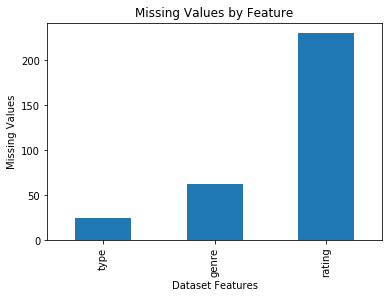

In [11]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar().set_title("Missing Values by Feature")
missing.plot.bar().set_xlabel('Dataset Features')
missing.plot.bar().set_ylabel('Missing Values')
missing.head()

#### The category with most missing values is found in 'rating' followed by 'gender' and 'type' respectively.

In [12]:
train['rating'].describe()

count    12064.000000
mean         6.473902
std          1.026746
min          1.670000
25%          5.880000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64

# Box plot

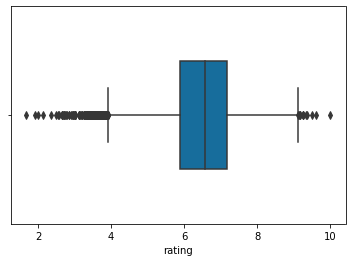

In [13]:
bplot = sns.boxplot(x='rating', 
                 data=train, 
                 width=0.5,
                 palette="colorblind")

### Dropping the rows with missing data ('na')

In [14]:
train = train.dropna()

In [15]:
train['rating'].describe()

count    12017.000000
mean         6.478264
std          1.023857
min          1.670000
25%          5.890000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64

#### Histogram

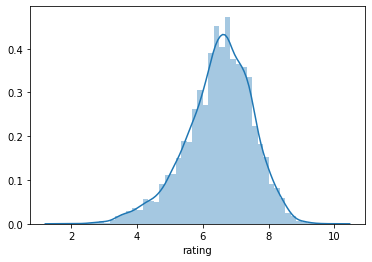

In [16]:
sns.distplot(train['rating']);
##%% md
## BarPlot
##%%
#sns.barplot(x="genre", y="rating", data=train).set_title("Rating according to genre");
##%% md
## PointPlot
##%%
#pp = sns.pointplot(x="genre", y="rating", data=train, palette = {"male":"blue", "female":"orange"}, markers=["x","o"], linestyles=["-","--"])
#pp.set_title("Survived Rate of Passenger Class")
#pp.set_xlabel("Passenger Class")
#pp.set_ylabel("Survived Rate");

In [17]:
#np.random.seed(1234)
#df = pd.DataFrame(np.random.randn(10,4),columns=['rating'])
#boxplot = df.boxplot(column=['rating'])


In [18]:
#cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
#df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
#df.iplot(kind='box', filename='cufflinks/box-plots')


# Separate a column into its values Features: genre , type


In [19]:
train = pd.DataFrame(train.genre.str.split(',').tolist(), 
                     index=[train.anime_id,train.type,train.episodes,train.rating,train.members]).stack()
train.head()
train = train.reset_index([0,'anime_id','type','episodes','rating','members'])
train.columns=['anime_id','type','episodes','rating','members','genre']
train.head()


,anime_id,type,episodes,rating,members,genre
0,32281,Movie,1,9.37,200630,Drama
1,32281,Movie,1,9.37,200630,Romance
2,32281,Movie,1,9.37,200630,School
3,32281,Movie,1,9.37,200630,Supernatural
4,5114,TV,64,9.26,793665,Action


In [20]:
train = pd.DataFrame(train.type.str.split(',').tolist(), 
                     index=[train.anime_id,train.type,train.episodes,train.rating,train.members]).stack()
train.head()

train = train.reset_index([0,'anime_id','type','episodes','rating','members'])
train.columns=['anime_id','type','episodes','rating','members','genre']
train.head()




,anime_id,type,episodes,rating,members,genre
0,32281,Movie,1,9.37,200630,Movie
1,32281,Movie,1,9.37,200630,Movie
2,32281,Movie,1,9.37,200630,Movie
3,32281,Movie,1,9.37,200630,Movie
4,5114,TV,64,9.26,793665,TV


# Hot Encoding


# get_dummies
